In [1]:
"""Raquel García Bellés
Bachelor's degree in Mathematics
Universitat Autònoma de Barcelona
Final project - Beating the Nyquist-Shannon theorem with randomness: the magic of compressed sensing.
Last update: 13/02/2021"""

import matplotlib.pyplot as plt
import numpy as np
pi = np.pi

# Nyquist-Shannon sampling theorem

In this first part we use the reconstruction formula from the Nyquist-Shannon theorem valid only for finite energy functions. We do take a sampling frequency above the Nyquist rate.

Number of samples: 420


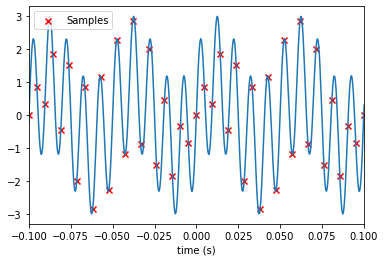

In [2]:
T = 1 # the full time interval is [-T,T]
window = 0.1 # we will only plot the function for the times in [-window,window]
low_freq = 20
high_freq = 100
fs = 2.1*high_freq # sampling frequency, we take it slightly above 2W to prevent errors

def points(fs,n):
    return n/(fs)
t = np.linspace(-T,T,50*high_freq) # time
N = np.int(np.ceil(2*fs*T)) # number of sample points
n = np.arange(np.ceil(-N/2),np.ceil(N/2),1)
sample_points = points(fs,n)

# Now we define our function:
def f(x):
    return np.sin(2*pi*low_freq*x) + 2*np.sin(2*pi*high_freq*x)
original_function = f(t)

# We sample the function:
sampled_function = f(sample_points)

plt.plot(t,original_function)
plt.scatter(sample_points,sampled_function, marker = 'x', color = 'red', label = 'Samples')
plt.xlim((-window,window))
plt.xlabel('time (s)')
plt.legend()
plt.savefig('NS1.png',bbox_inches='tight')
print('Number of samples:',N)

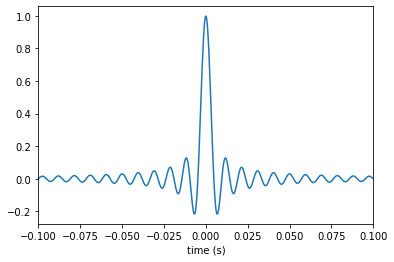

In [3]:
def impulse(t,n,fs):
    return np.sin(pi*(fs*t-n))/(pi*(fs*t-n))
plt.plot(t, impulse(t,0,fs)) #label = '$\sin 2\pi Wt/2\pi Wt$')
plt.xlim((-window,window))
plt.xlabel('time (s)')
plt.savefig('impulse.png',bbox_inches='tight')
#plt.legend()

C:\Users\raque\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


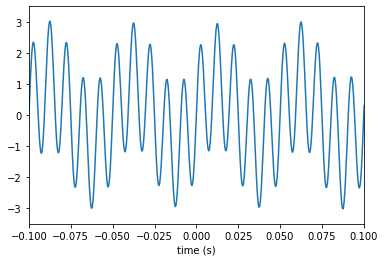

In [4]:
# Reconstructed signal
impulses = []
for n in np.arange(np.ceil(-N/2),np.ceil(N/2),1):
    impulses.append(impulse(t,n,fs)*sampled_function[np.int(n-np.ceil(-N/2))])
reconstructed_function = sum(impulses)
plt.plot(t,reconstructed_function)
plt.xlim(-window,window)
plt.xlabel('time (s)')
plt.savefig('NS1reconstructed.png',bbox_inches='tight')
#plt.plot(t,original_function,color = 'red')
#plt.scatter(sample_points,sampled_function, color ='red', marker = 'x')

The absolut error is: 0.061683536997394345


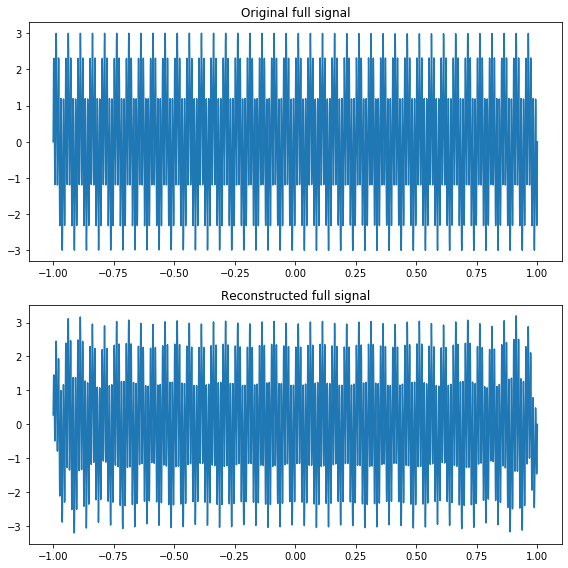

In [5]:
# Signal over the full time interval [-1,1]
fig, axs = plt.subplots(nrows = 2, ncols = 1,figsize = (8,8))
axs[1].plot(t,reconstructed_function)
#axs[1].set_xlabel('time (s)')
axs[1].set_title('Reconstructed full signal')

axs[0].plot(t,original_function)
#axs[0].set_xlabel('time (s)')
axs[0].set_title('Original full signal')
fig.tight_layout()

absolut_error = np.nansum(np.abs(reconstructed_function-original_function))/len(t)
print('The absolut error is:', absolut_error)

# Under-sampled signal

Number of samples: 67


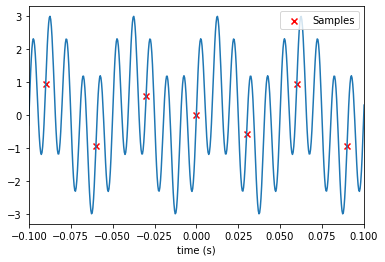

In [6]:
T = 1 # the full time interval is [-T,T]
window = 0.1 # we will only plot the function for the times in [-window,window]
low_freq = 20
high_freq = 100
fs = high_freq/3 # sampling frequency, we sample much below 2W

def points(fs,n):
    return n/(fs)
t = np.linspace(-T,T,50*high_freq) # time
N = np.int(np.ceil(2*fs*T)) # number of sample points
n = np.arange(np.ceil(-N/2),np.ceil(N/2),1)
sample_points = points(fs,n)

# Now we define our function:
def f(x):
    return np.sin(2*pi*low_freq*x) + 2*np.sin(2*pi*high_freq*x)
original_function = f(t)

# We sample the function:
sampled_function = f(sample_points)

plt.plot(t,original_function)
plt.scatter(sample_points,sampled_function, marker = 'x', color = 'red', label = 'Samples')
plt.xlim((-window,window))
plt.xlabel('time (s)')
plt.legend()
plt.savefig('NS2.png',bbox_inches='tight')
print('Number of samples:',N)

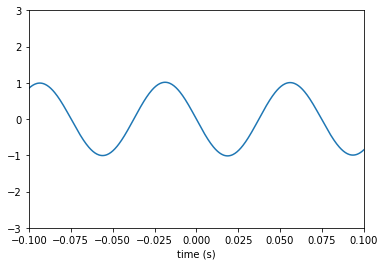

In [7]:
# Reconstructed signal
def impulse(t,n,fs):
    return np.sin(pi*(fs*t-n))/(pi*(fs*t-n))
impulses = []
for n in np.arange(np.ceil(-N/2),np.ceil(N/2),1):
    impulses.append(impulse(t,n,fs)*sampled_function[np.int(n-np.ceil(-N/2))])
plt.plot(t,sum(impulses))
plt.xlim(-window,window)
plt.xlabel('time (s)')
plt.ylim((-3,3))
plt.savefig('NS2reconstructed.png',bbox_inches='tight')

# Corrected formula for sines

Now we will repeat the same but using the reconstruction formula corrected for sinusoidal functions.

Number of samples: 420


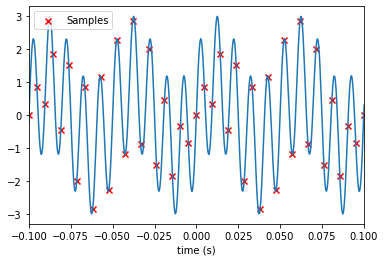

In [8]:
T = 1 # the full time interval is [-T,T]
window = 0.1 # we will only plot the function for the times in [-window,window]
low_freq = 20
high_freq = 100
fs = 2.1*high_freq # sampling frequency, we take it slightly above 2W to prevent errors
epsilon = pi*fs-2*pi*high_freq

def points(fs,n):
    return n/(fs)
t = np.linspace(-T,T,50*high_freq) # time
N = np.int(np.ceil(2*fs*T)) # number of sample points
n = np.arange(np.ceil(-N/2),np.ceil(N/2),1)
sample_points = points(fs,n)

# Now we define our function:
def f(x):
    return np.sin(2*pi*low_freq*x) + 2*np.sin(2*pi*high_freq*x)
original_function = f(t)

# We sample the function:
sampled_function = f(sample_points)

plt.plot(t,original_function)
plt.scatter(sample_points,sampled_function, marker = 'x', color = 'red', label = 'Samples')
plt.xlim((-window,window))
plt.xlabel('time (s)')
plt.legend()
#plt.savefig('NS1.png',bbox_inches='tight')
print('Number of samples:',N)

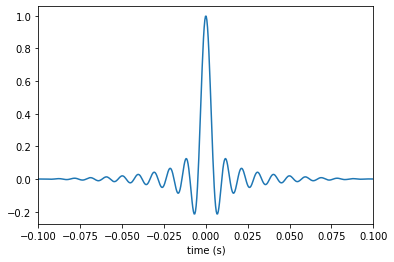

In [9]:
def impulse(t,n,fs):
    return np.sin(pi*(fs*t-n))/(pi*(fs*t-n))

# extra factor of the reconstruction formula
def correccio(t,n,fs,epsilon):
    return np.sin(epsilon*(n/fs-t))/(epsilon*(n/fs-t))
plt.plot(t, correccio(t,0,fs,epsilon)*impulse(t,0,fs)) #label = '$\sin 2\pi Wt/2\pi Wt$')
plt.xlim((-window,window))
plt.xlabel('time (s)')
plt.savefig('corrected_impulse.png',bbox_inches='tight')
#plt.legend()

C:\Users\raque\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\raque\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


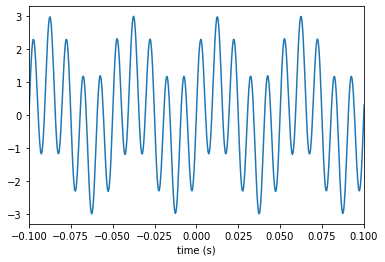

In [10]:
impulses = []
for n in np.arange(np.ceil(-N/2),np.ceil(N/2),1):
    impulses.append(impulse(t,n,fs)*correccio(t,n,fs,epsilon)*sampled_function[np.int(n-np.ceil(-N/2))])
reconstructed_function1 = sum(impulses)
plt.plot(t,reconstructed_function1)
#plt.plot(t,original_function,color = 'red')
plt.xlim(-window,window)
plt.xlabel('time (s)')
plt.savefig('NS1reconstructed_corrected.png',bbox_inches='tight')

The absolut error is: 0.02612548106135773


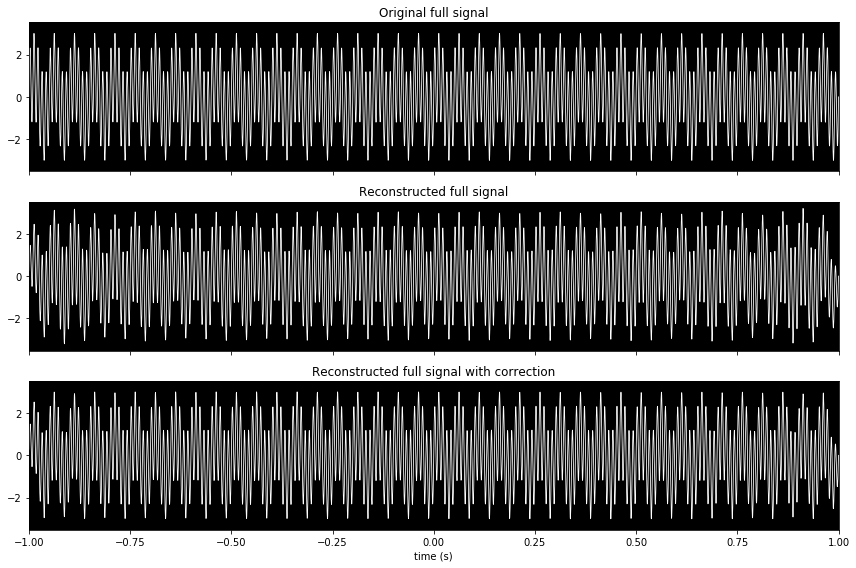

In [11]:
# Signal over the full time interval [-1,1]
fig, axs = plt.subplots(nrows = 3, ncols = 1,figsize = (12,8), sharex = True, sharey = True)


axs[1].plot(t,reconstructed_function, color = 'white', linewidth = 0.8)
#axs[1].set_xlabel('time (s)')
axs[1].set_title('Reconstructed full signal')
plt.setp(axs[1].get_xticklabels(), visible=False)
axs[1].set_facecolor('black')

axs[0].plot(t,original_function, color = 'white', linewidth = 0.8)
#axs[0].set_xlabel('time (s)')
axs[0].set_title('Original full signal')
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.xlim((-T,T))
axs[0].set_facecolor('black')


axs[2].plot(t,reconstructed_function1, color = 'white', linewidth = 0.8)
axs[2].set_title('Reconstructed full signal with correction')
axs[2].set_xlabel('time (s)')
plt.xlim((-T,T))
axs[2].set_facecolor('black')


fig.tight_layout()
plt.savefig('NScomparison.png',bbox_inches='tight')
absolut_error = np.nansum(np.abs(reconstructed_function1-original_function))/len(t)
print('The absolut error is:', absolut_error)

# Under-sampled signal with corrected formula

Number of samples: 67


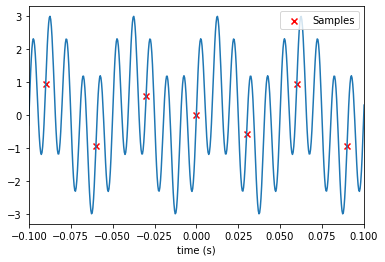

In [12]:
T = 1 # the full time interval is [-T,T]
window = 0.1 # we will only plot the function for the times in [-window,window]
low_freq = 20
high_freq = 100
fs = high_freq/3 # sampling frequency, we sample much below 2W

def points(fs,n):
    return n/(fs)
t = np.linspace(-T,T,50*high_freq) # time
N = np.int(np.ceil(2*fs*T)) # number of sample points
n = np.arange(np.ceil(-N/2),np.ceil(N/2),1)
sample_points = points(fs,n)

# Now we define our function:
def f(x):
    return np.sin(2*pi*low_freq*x) + 2*np.sin(2*pi*high_freq*x)
original_function = f(t)

# We sample the function:
sampled_function = f(sample_points)

plt.plot(t,original_function)
plt.scatter(sample_points,sampled_function, marker = 'x', color = 'red', label = 'Samples')
plt.xlim((-window,window))
plt.xlabel('time (s)')
plt.legend()
plt.savefig('NS2.png',bbox_inches='tight')
print('Number of samples:',N)

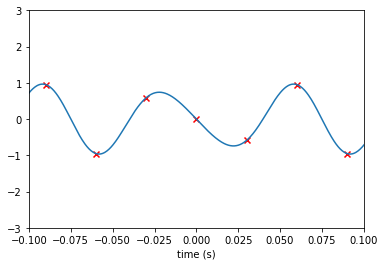

In [13]:
# Reconstructed signal
impulses = []
for n in np.arange(np.ceil(-N/2),np.ceil(N/2),1):
    impulses.append(impulse(t,n,fs)*correccio(t,n,fs,epsilon)*sampled_function[np.int(n-np.ceil(-N/2))])
reconstructed_function1 = sum(impulses)
plt.plot(t,reconstructed_function1)
plt.scatter(sample_points,sampled_function, color = 'red',marker = 'x')
#plt.plot(t,original_function,color = 'red')
plt.xlim(-window,window)
plt.ylim(-3,3)
plt.xlabel('time (s)')
plt.savefig('NS1undersampled_corrected.png',bbox_inches='tight')